# Self-Driving Car Engineer Nanodegree

## Deep Learning

## Project: Build a Traffic Sign Recognition Classifier

In this notebook, a template is provided for you to implement your functionality in stages, which is required to successfully complete this project. If additional code is required that cannot be included in the notebook, be sure that the Python code is successfully imported and included in your submission if necessary. 

> **Note**: Once you have completed all of the code implementations, you need to finalize your work by exporting the iPython Notebook as an HTML document. Before exporting the notebook to html, all of the code cells need to have been run so that reviewers can see the final implementation and output. You can then export the notebook by using the menu above and navigating to  \n",
    "**File -> Download as -> HTML (.html)**. Include the finished document along with this notebook as your submission. 

In addition to implementing code, there is a writeup to complete. The writeup should be completed in a separate file, which can be either a markdown file or a pdf document. There is a [write up template](https://github.com/udacity/CarND-Traffic-Sign-Classifier-Project/blob/master/writeup_template.md) that can be used to guide the writing process. Completing the code template and writeup template will cover all of the [rubric points](https://review.udacity.com/#!/rubrics/481/view) for this project.

The [rubric](https://review.udacity.com/#!/rubrics/481/view) contains "Stand Out Suggestions" for enhancing the project beyond the minimum requirements. The stand out suggestions are optional. If you decide to pursue the "stand out suggestions", you can include the code in this Ipython notebook and also discuss the results in the writeup file.


>**Note:** Code and Markdown cells can be executed using the **Shift + Enter** keyboard shortcut. In addition, Markdown cells can be edited by typically double-clicking the cell to enter edit mode.

---
## Step 0: Load The Data

In [1]:
### Importing necessary libraries

import matplotlib.image as mpimg        # Needed to handle images
import numpy as np                      # Needed for general python array functions
import matplotlib.pyplot as plt         # Needed to plot images for data visualization
import matplotlib.pyplot as plt1        # Needed to plot images for data visualization
import cv2                              # Needed for image visualization and pre-processing functions
import os                               # Needed for file handling functions
import tensorflow as tf                 # Needed to use Tensor Flow libraries
import datetime                         # Needed for printing timestamp
from sklearn.utils import shuffle       # Used to shuffle training data
from tensorflow.contrib.layers import flatten    # Used to flatten multi-dimensional array to 1 dimension


print('All modules imported.')

All modules imported.


In [2]:
### Loading data from pickle file

import pickle                                   # Load pickled data

training_file = 'train.p'
validation_file='valid.p'
testing_file = 'test.p'

with open(training_file, mode='rb') as f:
    train = pickle.load(f)
with open(validation_file, mode='rb') as f:
    valid = pickle.load(f)
with open(testing_file, mode='rb') as f:
    test = pickle.load(f)
    
X_train, y_train = train['features'], train['labels']
X_valid, y_valid = valid['features'], valid['labels']
X_test, y_test = test['features'], test['labels']

print()
print('~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~')
print('INPUT FILE CHARACTERISTICS')
print('~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~')
print()
print('Training file =', X_train.shape)
print('Validation file =', X_valid.shape)
print('Test file =', X_test.shape)
print()

print('All data loaded from pickle file.')


~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~
INPUT FILE CHARACTERISTICS
~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~

Training file = (34799, 32, 32, 3)
Validation file = (4410, 32, 32, 3)
Test file = (12630, 32, 32, 3)

All data loaded from pickle file.


---

## Step 1: Dataset Summary & Exploration

The pickled data is a dictionary with 4 key/value pairs:

- `'features'` is a 4D array containing raw pixel data of the traffic sign images, (num examples, width, height, channels).
- `'labels'` is a 1D array containing the label/class id of the traffic sign. The file `signnames.csv` contains id -> name mappings for each id.
- `'sizes'` is a list containing tuples, (width, height) representing the original width and height the image.
- `'coords'` is a list containing tuples, (x1, y1, x2, y2) representing coordinates of a bounding box around the sign in the image. **THESE COORDINATES ASSUME THE ORIGINAL IMAGE. THE PICKLED DATA CONTAINS RESIZED VERSIONS (32 by 32) OF THESE IMAGES**

Complete the basic data summary below. Use python, numpy and/or pandas methods to calculate the data summary rather than hard coding the results. For example, the [pandas shape method](http://pandas.pydata.org/pandas-docs/stable/generated/pandas.DataFrame.shape.html) might be useful for calculating some of the summary results. 

### Provide a Basic Summary of the Data Set Using Python, Numpy and/or Pandas

In [3]:
### Get Data characteristics

# Number of training examples
n_train = len(X_train)

# Number of validation examples
n_validation = len(X_valid)

# Number of testing examples.
n_test = len(X_test)

# Shape of an traffic sign image
image_shape = [X_train[0].shape]

# Unique classes/labels in the dataset.
n_classes = np.unique(y_train).shape

print()
print('~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~')
print('INPUT DATA CHARACTERISTICS')
print('~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~')
print()
print("Number of training examples =", n_train)
print("Number of validation examples =", n_validation)
print("Number of testing examples =", n_test)
print("Image data shape =", image_shape)
print("Number of classes =", n_classes)


~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~
INPUT DATA CHARACTERISTICS
~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~

Number of training examples = 34799
Number of validation examples = 4410
Number of testing examples = 12630
Image data shape = [(32, 32, 3)]
Number of classes = (43,)


### Include an exploratory visualization of the dataset

Visualize the German Traffic Signs Dataset using the pickled file(s). This is open ended, suggestions include: plotting traffic sign images, plotting the count of each sign, etc. 

The [Matplotlib](http://matplotlib.org/) [examples](http://matplotlib.org/examples/index.html) and [gallery](http://matplotlib.org/gallery.html) pages are a great resource for doing visualizations in Python.

**NOTE:** It's recommended you start with something simple first. If you wish to do more, come back to it after you've completed the rest of the sections. It can be interesting to look at the distribution of classes in the training, validation and test set. Is the distribution the same? Are there more examples of some classes than others?

~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~
VISUALIZING A SAMPLE IMAGE TO MAKE SURE FILE IS NOT CORRUPTED
~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~
Label = 31


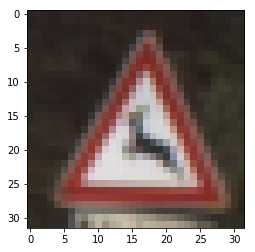

~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~
VISUALIZING TRAINING CLASS DISTRIBUTION
~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~


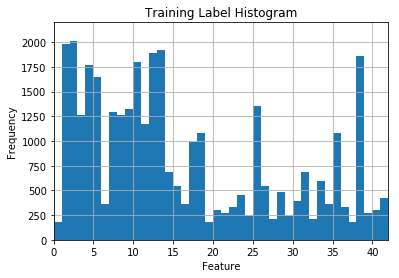

[[   0    1    2    3    4    5    6    7    8    9   10   11   12   13
    14   15   16   17   18   19   20   21   22   23   24   25   26   27
    28   29   30   31   32   33   34   35   36   37   38   39   40   41
    42]
 [ 180 1980 2010 1260 1770 1650  360 1290 1260 1320 1800 1170 1890 1920
   690  540  360  990 1080  180  300  270  330  450  240 1350  540  210
   480  240  390  690  210  599  360 1080  330  180 1860  270  300  210
   210]]
~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~
VISUALIZING VALIDATION CLASS DISTRIBUTION
~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~


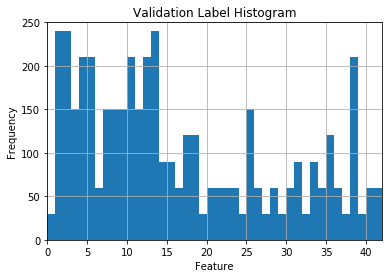

[[  0   1   2   3   4   5   6   7   8   9  10  11  12  13  14  15  16  17
   18  19  20  21  22  23  24  25  26  27  28  29  30  31  32  33  34  35
   36  37  38  39  40  41  42]
 [ 30 240 240 150 210 210  60 150 150 150 210 150 210 240  90  90  60 120
  120  30  60  60  60  60  30 150  60  30  60  30  60  90  30  90  60 120
   60  30 210  30  60  30  30]]
  
~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~
CHECKING IF ALL LABELS IN TEST SET ARE PRESENT IN TRAINING SET
~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~
Training labels are  [ 0  1  2  3  4  5  6  7  8  9 10 11 12 13 14 15 16 17 18 19 20 21 22 23 24
 25 26 27 28 29 30 31 32 33 34 35 36 37 38 39 40 41 42]
Training labels are  [ 0  1  2  3  4  5  6  7  8  9 10 11 12 13 14 15 16 17 18 19 20 21 22 23 24
 25 26 27 28 29 30 31 32 33 34 35 36 37 38 39 40 41 42]


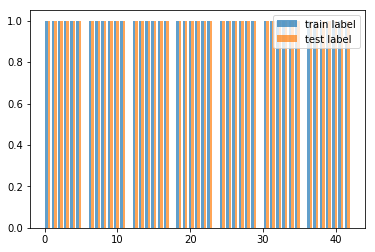

**********************************************************
GOOD NEWS : Training and Testing datasets have same labels


In [4]:
### Data visualization

# Visualizations will be shown in the notebook
%matplotlib inline        

print('~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~')
print('VISUALIZING A SAMPLE IMAGE TO MAKE SURE FILE IS NOT CORRUPTED')
print('~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~')
print('Label =', y_train[500])
plt.imshow(X_train[500])
plt.show()

print('~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~')
print('VISUALIZING TRAINING CLASS DISTRIBUTION')
print('~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~')
n, bins, patches = plt.hist(y_train, bins=42)
plt.title("Training Label Histogram")
plt.xlabel("Feature")
plt.ylabel("Frequency")
plt.axis([0, 42, 0, 2200])
plt.grid(True)
plt.show()

unique, counts = np.unique(y_train, return_counts=True)
#print(np.asarray((unique, counts)).T)
print(np.asarray((unique, counts)))

print('~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~')
print('VISUALIZING VALIDATION CLASS DISTRIBUTION')
print('~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~')
n, bins, patches = plt.hist(y_valid, bins=42)
plt.title("Validation Label Histogram")
plt.xlabel("Feature")
plt.ylabel("Frequency")
plt.axis([0, 42, 0, 250])
plt.grid(True)
plt.show()

unique, counts = np.unique(y_valid, return_counts=True)
#print(np.asarray((unique, counts)).T)
print(np.asarray((unique, counts)))

print('  ')
print('~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~')
print('CHECKING IF ALL LABELS IN TEST SET ARE PRESENT IN TRAINING SET')
print('~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~')
train_labels = np.unique(y_train)
test_labels = np.unique(y_test)
label_check = train_labels - test_labels
print('Training labels are ', train_labels)
print('Training labels are ', test_labels)

label_quality = True
for x in label_check : 
    if x > 0 : 
        print('Training dataset has more labels')
        label_quality = False
    if x < 0 :
        print('Testing dataset has more labels')
        label_quality = False

x = train_labels
y = test_labels
data = np.vstack([x, y]).T
bins = np.linspace(0, 42)

plt1.hist(data, bins, alpha=0.7, label=['train label', 'test label'])
plt1.legend(loc='upper right')
plt1.show()

print('**********************************************************')
if label_quality : 
    print('GOOD NEWS : Training and Testing datasets have same labels')
else :
    print('BAD NEWS : Training and Testing datasets have different labels')

    print('**********************************************************')

In [5]:
### Creating jittered images.

# Most of the code below has been reused from Vivek Yadav's code described in his blog post below :
# medium.com/@vivek.yadav/dealing-with-unbalanced-data-generating-additional-data-by-jittering-the-original-image-7497fe2119c3


#***************************************************************************************
#    Title: Image Augumentaion
#    Author: Vivek Yadav
#    Availability: https://github.com/vxy10/ImageAugmentation
#
#**************************************************************************************/

import matplotlib.gridspec as gridspec

%matplotlib inline
import matplotlib.image as mpimg


def augment_brightness_camera_images(image):
    image1 = cv2.cvtColor(image,cv2.COLOR_RGB2HSV)
    random_bright = .25+np.random.uniform()
    #print(random_bright)
    image1[:,:,2] = image1[:,:,2]*random_bright
    image1 = cv2.cvtColor(image1,cv2.COLOR_HSV2RGB)
    return image1
    

def transform_image(img,ang_range,shear_range,trans_range,brightness=0):
    '''
    This function transforms images to generate new images.
    The function takes in following arguments,
    1- Image
    2- ang_range: Range of angles for rotation
    3- shear_range: Range of values to apply affine transform to
    4- trans_range: Range of values to apply translations over.

    A Random uniform distribution is used to generate different parameters for transformation

    '''
    # Rotation

    ang_rot = np.random.uniform(ang_range)-ang_range/2
    rows,cols,ch = img.shape    
    Rot_M = cv2.getRotationMatrix2D((cols/2,rows/2),ang_rot,1)

    # Translation
    tr_x = trans_range*np.random.uniform()-trans_range/2
    tr_y = trans_range*np.random.uniform()-trans_range/2
    Trans_M = np.float32([[1,0,tr_x],[0,1,tr_y]])

    # Shear
    pts1 = np.float32([[5,5],[20,5],[5,20]])

    pt1 = 5+shear_range*np.random.uniform()-shear_range/2
    pt2 = 20+shear_range*np.random.uniform()-shear_range/2

    # Brightness


    pts2 = np.float32([[pt1,5],[pt2,pt1],[5,pt2]])

    shear_M = cv2.getAffineTransform(pts1,pts2)

    img = cv2.warpAffine(img,Rot_M,(cols,rows))
    img = cv2.warpAffine(img,Trans_M,(cols,rows))
    img = cv2.warpAffine(img,shear_M,(cols,rows))

    if brightness == 1:
      img = augment_brightness_camera_images(img)

    return img

"""
image = mpimg.imread('inImg//00SpeedL20.jpg')
image = mpimg.imread('inImg//visualize_cnn.png')

plt.imshow(image);
plt.axis('off');

gs1 = gridspec.GridSpec(10, 10)
gs1.update(wspace=0.01, hspace=0.02) # set the spacing between axes.
plt.figure(figsize=(12,12))
for i in range(100):
    ax1 = plt.subplot(gs1[i])
    ax1.set_xticklabels([])
    ax1.set_yticklabels([])
    ax1.set_aspect('equal')
    img = transform_image(image,20,10,5,brightness=1)

    plt.subplot(10,10,i+1)
    plt.imshow(img)
    plt.axis('off')

j = 2
plt.show()
imgName = 'outImg//' + 'filename-' + str(j) + '.jpg'
mpimg.imsave(imgName, image)

"""    
print()

Training dataset shape before any augumentation (34799, 32, 32, 3)
Training label shape before any augumentation (34799,)
Training dataset shape after augumenting with jitters of existing images (73077, 32, 32, 3)
Training label shape after augumenting with jitters of existing images (73077,)
Training dataset shape after augumenting with jitters of new images (93077, 32, 32, 3)
Training label shape after augumenting with jitters of new images (93077,)
~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~
VISUALIZING TRAINING CLASS DISTRIBUTION POST DATA AUGUMENTATION
~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~


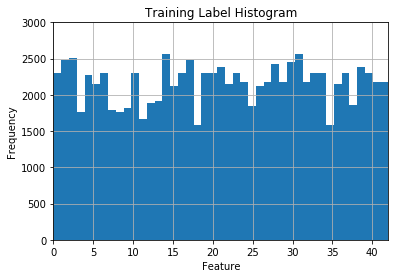

In [6]:
### Augumenting Training Data


AX_train = np.copy(X_train)
Ay_train = np.copy(y_train)
print('Training dataset shape before any augumentation', AX_train.shape)
print('Training label shape before any augumentation', Ay_train.shape)

# Balancing the image distribution by filling with jittered images of images available in training set

# Array that holds the labels of images that need more representation
imgs_to_fix = (0, 6, 14, 16, 19, 20, 21, 22, 23, 24, 27, 28, 29, 30, 32, 
               34, 36, 37, 39, 40, 41, 42, 15, 17, 26, 31, 33)
# Array that holds the factor that decides the number of jitters to create for a image read from training dataset
imgs_jit_factor = (9, 4, 2, 4, 9, 5, 6, 4, 3, 6, 7, 3, 6, 4, 7, 
                   4, 4, 9, 6, 5, 7, 7, 2, 1, 2, 2, 2)
# Array that holds the count of new images to be created from existing images in training dataset
imgs_count = (1620, 1440, 1380, 1440, 1620, 1500, 1620, 1320, 1350, 1440, 1470, 1440, 1440, 1560, 1470, 
             1440, 1320, 1620, 1620, 1500, 1470, 1470, 1080, 990, 1080, 1380, 1198)

for i, label in enumerate(imgs_to_fix):
    new_images = np.zeros(shape=(imgs_count[i], 32,32,3))
    new_labels = np.empty(imgs_count[i])
    new_labels.fill(label)
    l = 0
    for j, image in enumerate(AX_train):
        if Ay_train[j] == label:
            for k in range(imgs_jit_factor[i]):
                new_image = transform_image(np.uint8(image),20,10,5,brightness=1)
                new_images [l] = new_image
                l += 1
    AX_train = np.concatenate((AX_train, new_images), axis=0)
    Ay_train = np.concatenate((Ay_train, new_labels), axis=0)

print('Training dataset shape after augumenting with jitters of existing images', AX_train.shape)
print('Training label shape after augumenting with jitters of existing images', Ay_train.shape)


#  Adding fresh data downloaded from internet to the training set along with jittering

imgs_to_create = 500

indir = 'inImg' # folder to iterate
outdir = 'outImg//'

for filename in os.listdir(indir):

    infname = os.path.join(indir, filename)
    image = cv2.imread(infname)
    image = cv2.cvtColor(image,cv2.COLOR_BGR2RGB)
    label = int(filename[:2])
    image_count = imgs_to_create
#    print(label, ',', image_count)
    
    new_images = np.zeros(shape=(image_count, 32,32,3))
    new_labels = np.empty(image_count)
    new_labels.fill(label)
    
    if image_count > 0:
        for i in range(image_count):
            new_image = transform_image(image,20,10,5,brightness=1)
            new_images [i] = new_image
#            outfname = outdir + 'label' + str(label) + '-' + str(i) + '.jpg'
#            cv2.imwrite(outfname, new_image)
     
    AX_train = np.concatenate((AX_train, new_images), axis=0)
    Ay_train = np.concatenate((Ay_train, new_labels), axis=0)

print('Training dataset shape after augumenting with jitters of new images', AX_train.shape)
print('Training label shape after augumenting with jitters of new images', Ay_train.shape)

print('~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~')
print('VISUALIZING TRAINING CLASS DISTRIBUTION POST DATA AUGUMENTATION')
print('~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~')

n, bins, patches = plt.hist(Ay_train, bins=43)
plt.title("Training Label Histogram")
plt.xlabel("Feature")
plt.ylabel("Frequency")
plt.axis([0, 42, 0, 3000])
plt.grid(True)
plt.show()

In [7]:
### Get label counts

unique, counts = np.unique(Ay_train, return_counts=True)
print(np.asarray((unique, counts)).T)
#print(np.asarray((unique, counts)))

[[  0.00000000e+00   2.30000000e+03]
 [  1.00000000e+00   2.48000000e+03]
 [  2.00000000e+00   2.51000000e+03]
 [  3.00000000e+00   1.76000000e+03]
 [  4.00000000e+00   2.27000000e+03]
 [  5.00000000e+00   2.15000000e+03]
 [  6.00000000e+00   2.30000000e+03]
 [  7.00000000e+00   1.79000000e+03]
 [  8.00000000e+00   1.76000000e+03]
 [  9.00000000e+00   1.82000000e+03]
 [  1.00000000e+01   2.30000000e+03]
 [  1.10000000e+01   1.67000000e+03]
 [  1.20000000e+01   1.89000000e+03]
 [  1.30000000e+01   1.92000000e+03]
 [  1.40000000e+01   2.57000000e+03]
 [  1.50000000e+01   2.12000000e+03]
 [  1.60000000e+01   2.30000000e+03]
 [  1.70000000e+01   2.48000000e+03]
 [  1.80000000e+01   1.58000000e+03]
 [  1.90000000e+01   2.30000000e+03]
 [  2.00000000e+01   2.30000000e+03]
 [  2.10000000e+01   2.39000000e+03]
 [  2.20000000e+01   2.15000000e+03]
 [  2.30000000e+01   2.30000000e+03]
 [  2.40000000e+01   2.18000000e+03]
 [  2.50000000e+01   1.85000000e+03]
 [  2.60000000e+01   2.12000000e+03]
 

----

## Step 2: Design and Test a Model Architecture

Design and implement a deep learning model that learns to recognize traffic signs. Train and test your model on the [German Traffic Sign Dataset](http://benchmark.ini.rub.de/?section=gtsrb&subsection=dataset).

The LeNet-5 implementation shown in the [classroom](https://classroom.udacity.com/nanodegrees/nd013/parts/fbf77062-5703-404e-b60c-95b78b2f3f9e/modules/6df7ae49-c61c-4bb2-a23e-6527e69209ec/lessons/601ae704-1035-4287-8b11-e2c2716217ad/concepts/d4aca031-508f-4e0b-b493-e7b706120f81) at the end of the CNN lesson is a solid starting point. You'll have to change the number of classes and possibly the preprocessing, but aside from that it's plug and play! 

With the LeNet-5 solution from the lecture, you should expect a validation set accuracy of about 0.89. To meet specifications, the validation set accuracy will need to be at least 0.93. It is possible to get an even higher accuracy, but 0.93 is the minimum for a successful project submission. 

There are various aspects to consider when thinking about this problem:

- Neural network architecture (is the network over or underfitting?)
- Play around preprocessing techniques (normalization, rgb to grayscale, etc)
- Number of examples per label (some have more than others).
- Generate fake data.

Here is an example of a [published baseline model on this problem](http://yann.lecun.com/exdb/publis/pdf/sermanet-ijcnn-11.pdf). It's not required to be familiar with the approach used in the paper but, it's good practice to try to read papers like these.

### Pre-process the Data Set (normalization, grayscale, etc.)

Minimally, the image data should be normalized so that the data has mean zero and equal variance. For image data, `(pixel - 128)/ 128` is a quick way to approximately normalize the data and can be used in this project. 

Other pre-processing steps are optional. You can try different techniques to see if it improves performance. 

Use the code cell (or multiple code cells, if necessary) to implement the first step of your project.

In [8]:
### Preprocessing the data. 

# Convert to grayscale

GX_train = AX_train
GX_valid = X_valid
GX_test = X_test

grayscale_convertor = np.array([[0.2989],[0.5870],[0.1140]])

def grayout_image(img):
    return np.dot(img[:,:,:,],grayscale_convertor)
    

GX_train = np.zeros(shape=(len(AX_train), 32,32,1))
GX_train[:,:,:,] = grayout_image(AX_train)

GX_valid = np.zeros(shape=(len(X_valid), 32,32,1))
GX_valid[:,:,:,] = grayout_image(X_valid)
    
GX_test = np.zeros(shape=(len(X_test), 32,32,1))
GX_test[:,:,:,] = grayout_image(X_test)


# Normalize image
    
def normalize_image(image_data):
    return ((image_data / 255) - 0.5)

GX_train = normalize_image(GX_train)
GX_valid = normalize_image(GX_valid)
GX_test = normalize_image(GX_test)


print('Training dataset shape after grayscaling', GX_train.shape)
print('Validation dataset shape after grayscaling', GX_valid.shape)
print('Image data preprocessing complete')

Training dataset shape after grayscaling (93077, 32, 32, 1)
Validation dataset shape after grayscaling (4410, 32, 32, 1)
Image data preprocessing complete


### Model Architecture

In [9]:
### LeNet model 

# Hyperparameters
mu = 0
sigma = 0.1

def LeNet(x, keep_prob):    


    # Layer 1: Convolutional. Input = 32x32x1. Output = 28x28x32.
    conv1_W = tf.Variable(tf.truncated_normal(shape=(5, 5, 1, 32), mean = mu, stddev = sigma))
    conv1_b = tf.Variable(tf.zeros(32))
    conv1   = tf.nn.conv2d(x, conv1_W, strides=[1, 1, 1, 1], padding='VALID') + conv1_b

    # ReLU Activation.
    conv1 = tf.nn.relu(conv1)

    # Max Pooling. Input = 28x28x32. Output = 14x14x32.
    conv1 = tf.nn.max_pool(conv1, ksize=[1, 2, 2, 1], strides=[1, 2, 2, 1], padding='VALID')

    # Layer 2: Convolutional. Input = = 14x14x32 Output = 10x10x64.
    conv2_W = tf.Variable(tf.truncated_normal(shape=(5, 5, 32, 64), mean = mu, stddev = sigma))
    conv2_b = tf.Variable(tf.zeros(64))
    conv2   = tf.nn.conv2d(conv1, conv2_W, strides=[1, 1, 1, 1], padding='VALID') + conv2_b

    # ReLU Activation.
    conv2 = tf.nn.relu(conv2)

    # Max Pooling. Input = 10x10x64. Output = 5x5x64.
#    conv2 = tf.nn.max_pool(conv2, ksize=[1, 2, 2, 1], strides=[1, 2, 2, 1], padding='VALID')

    # Layer 3: Convolutional. Input = = 10x10x64. Output = 10x10x128.
    conv3_W = tf.Variable(tf.truncated_normal(shape=(1, 1, 64, 128), mean = mu, stddev = sigma))
    conv3_b = tf.Variable(tf.zeros(128))
    conv3   = tf.nn.conv2d(conv2, conv3_W, strides=[1, 1, 1, 1], padding='VALID') + conv3_b

    # ReLU Activation.
    conv3 = tf.nn.relu(conv3)

    # Max Pooling. Input = 10x10x128. Output = 5x5x128.
    conv3 = tf.nn.max_pool(conv3, ksize=[1, 2, 2, 1], strides=[1, 2, 2, 1], padding='VALID')

    
    # Flatten. Input = 5x5x128. Output = 3200.
    fc0   = flatten(conv3)


    # Layer 4: Fully Connected. Input = 3200. Output = 512.
    fc1_W = tf.Variable(tf.truncated_normal(shape=(3200, 512), mean = mu, stddev = sigma))
    fc1_b = tf.Variable(tf.zeros(512))
    fc1   = tf.matmul(fc0, fc1_W) + fc1_b

    # ReLU Activation.
    fc1    = tf.nn.relu(fc1)

    # Layer 5: Fully Connected. Input = 512. Output = 256.
    fc2_W  = tf.Variable(tf.truncated_normal(shape=(512, 256), mean = mu, stddev = sigma))
    fc2_b  = tf.Variable(tf.zeros(256))
    fc2    = tf.matmul(fc1, fc2_W) + fc2_b

    # ReLU Activation.
    fc2    = tf.nn.relu(fc2)

    
    # Layer 6: Fully Connected. Input = 256. Output = 128.
    fc3_W  = tf.Variable(tf.truncated_normal(shape=(256, 128), mean = mu, stddev = sigma))
    fc3_b  = tf.Variable(tf.zeros(128))
    fc3    = tf.matmul(fc2, fc3_W) + fc3_b

    # ReLU Activation.
    fc3    = tf.nn.relu(fc3)

    # Dropout Layer
    fc3 = tf.nn.dropout(fc3, keep_prob)

    # Layer 7: Fully Connected. Input = 128. Output = 43.
    fc4_W  = tf.Variable(tf.truncated_normal(shape=(128, 43), mean = mu, stddev = sigma))
    fc4_b  = tf.Variable(tf.zeros(43))
    logits = tf.matmul(fc3, fc4_W) + fc4_b

    return conv1, conv2, conv3, logits

### Train, Validate and Test the Model

A validation set can be used to assess how well the model is performing. A low accuracy on the training and validation
sets imply underfitting. A high accuracy on the training set but low accuracy on the validation set implies overfitting.

In [10]:
### Training and Validation parameters

x = tf.placeholder(tf.float32, (None, 32, 32, 1))
y = tf.placeholder(tf.int32, (None))
one_hot_y = tf.one_hot(y, 43)
keep_prob = tf.placeholder(tf.float32)

# Hyperparameters
EPOCHS = 10
BATCH_SIZE = 128
rate = 0.001

c1, c2, c3, logits = LeNet(x, keep_prob)
cross_entropy = tf.nn.softmax_cross_entropy_with_logits(labels=one_hot_y, logits=logits)
loss_operation = tf.reduce_mean(cross_entropy)
optimizer = tf.train.AdamOptimizer(learning_rate = rate)
training_operation = optimizer.minimize(loss_operation)

correct_prediction = tf.equal(tf.argmax(logits, 1), tf.argmax(one_hot_y, 1))
accuracy_operation = tf.reduce_mean(tf.cast(correct_prediction, tf.float32))
saver = tf.train.Saver()

def evaluate(X_data, y_data):
    num_examples = len(X_data)
    total_accuracy = 0
    sess = tf.get_default_session()
    for offset in range(0, num_examples, BATCH_SIZE):
        batch_x, batch_y = X_data[offset:offset+BATCH_SIZE], y_data[offset:offset+BATCH_SIZE]
        accuracy = sess.run(accuracy_operation, feed_dict={x: batch_x, y: batch_y, keep_prob: 1.0})
        total_accuracy += (accuracy * len(batch_x))
    return total_accuracy / num_examples

  
~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~
STARTING TRAINING AT  2017-05-01 14:49:03.581869
~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~

Execution Parameters 
Weight mean =  0  sigma =  0.1
EPOCHS =  10
BATCH_SIZE =  128
Learn rate =  0.001

0:02:20.175256  EPOCH 1 ... with loss  1.19216
Validation Accuracy = 0.884

0:02:21.739493  EPOCH 2 ... with loss  0.329831
Validation Accuracy = 0.946

0:02:21.404148  EPOCH 3 ... with loss  0.176842
Validation Accuracy = 0.954

0:02:22.436988  EPOCH 4 ... with loss  0.167027
Validation Accuracy = 0.960

0:02:22.479543  EPOCH 5 ... with loss  0.0261455
Validation Accuracy = 0.970

0:02:22.944802  EPOCH 6 ... with loss  0.00486217
Validation Accuracy = 0.963

0:02:22.685670  EPOCH 7 ... with loss  0.0489287
Validation Accuracy = 0.972

0:02:23.709812  EPOCH 8 ... with loss  0.0939626
Validation Accuracy = 0.966

0:02:26.247877  EPOCH 9 ... with loss  0.0645848
Val

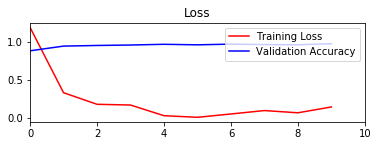

In [11]:
### Training and Validation of the model

training_loss_history = np.zeros(shape=(EPOCHS))
validation_accuracy_history = np.zeros(shape=(EPOCHS))

with tf.Session() as sess:
    sess.run(tf.global_variables_initializer())
    num_examples = len(GX_train)

    start_time = datetime.datetime.now()
    batch_time = datetime.datetime.now()
    print('  ')
    print('~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~')
    print('STARTING TRAINING AT ', start_time)
    print('~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~')
    print()
    print('Execution Parameters ')
    print('Weight mean = ', mu, ' sigma = ', sigma)
    print('EPOCHS = ', EPOCHS)
    print('BATCH_SIZE = ', BATCH_SIZE)
    print('Learn rate = ', rate)
    print()

    for i in range(EPOCHS):
        GX_train, Ay_train = shuffle(GX_train, Ay_train)
        for offset in range(0, num_examples, BATCH_SIZE):
            end = offset + BATCH_SIZE
            batch_x, batch_y = GX_train[offset:end], Ay_train[offset:end]
            _, loss = sess.run([training_operation, loss_operation], feed_dict={x: batch_x, y: batch_y, keep_prob: 0.5})
        
        training_loss_history[i] = loss

        validation_accuracy = evaluate(GX_valid, y_valid)
        validation_accuracy_history[i] = validation_accuracy
        print(datetime.datetime.now() - batch_time, " EPOCH {} ...".format(i+1), "with loss ", loss)
        print("Validation Accuracy = {:.3f}".format(validation_accuracy))
        print()
        batch_time = datetime.datetime.now()
    print('  ')
    print('~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~')
    print('TRAINING COMPLETE AT ', datetime.datetime.now(), ' with execution time of ', datetime.datetime.now() - start_time)
    print('~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~')
    print()        
    saver.save(sess, './lenet')
    print("Model saved")
    
    
#    print("Testing Accuracy = {:.3f}".format(testing_accuracy))

loss_plot = plt.subplot(2,1,1)
loss_plot.set_title('Loss')
loss_plot.plot(training_loss_history, 'r', label='Training Loss')
loss_plot.plot(validation_accuracy_history, 'b', label='Validation Accuracy')
loss_plot.set_xlim([0, EPOCHS])
loss_plot.legend(loc=1)

In [12]:
### Testing the model

saver = tf.train.Saver()

# Launch the graph
with tf.Session() as sess:
    saver.restore(sess, './lenet')
    
    test_accuracy = evaluate(GX_test, y_test)

print('Test Accuracy: {}'.format(test_accuracy))

Test Accuracy: 0.9459224070336076


---

## Step 3: Test a Model on New Images

To give yourself more insight into how your model is working, download at least five pictures of German traffic signs from the web and use your model to predict the traffic sign type.

You may find `signnames.csv` useful as it contains mappings from the class id (integer) to the actual sign name.

### Load and Output the Images

28.0


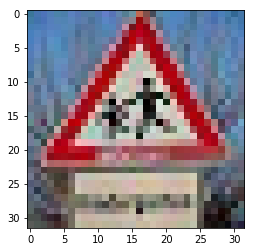

34.0


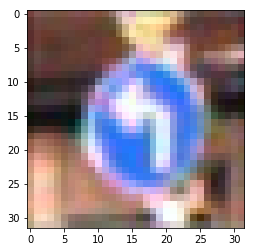

1.0


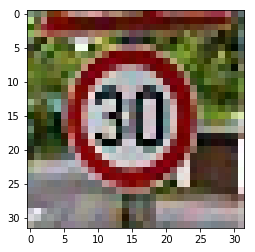

11.0


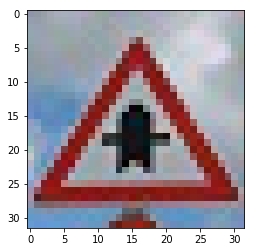

17.0


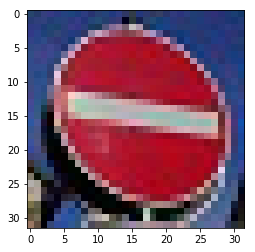

In [13]:
### Load the images and plot them here.
### Feel free to use as many code cells as needed.

indir = 'testImgs' # folder to iterate
downloaded_images = np.zeros(shape=(5, 32,32,3))
downloaded_labels = np.empty(5)

di = 0
for filename in os.listdir(indir):

    infname = os.path.join(indir, filename)
    img = cv2.imread(infname)
    img = cv2.cvtColor(img,cv2.COLOR_BGR2RGB)
    downloaded_images[di] = img
    downloaded_labels[di] = int(filename[:2])
    print(downloaded_labels[di])
    plt.imshow(img)
    plt.show()
    di += 1

### Predict the Sign Type for Each Image

In [14]:
### Run the predictions here and use the model to output the prediction for each image.
### Make sure to pre-process the images with the same pre-processing pipeline used earlier.

g_downloaded_images = np.zeros(shape=(5,32,32,1))
g_downloaded_images[:,:,:,] = grayout_image(downloaded_images)
g_downloaded_images = normalize_image(g_downloaded_images)


saver = tf.train.Saver()
#downloaded_images = np.zeros(shape=(5, 43))

# Launch the graph
with tf.Session() as sess:
    init = tf.global_variables_initializer()
    sess.run(init)
    saver.restore(sess, './lenet')
    
    predictions = sess.run(logits, feed_dict={x: g_downloaded_images, keep_prob: 1.0})
    pred = sess.run(tf.argmax(predictions, 1))
    print('Prediction of model on new images is', pred)
    print('Correct label values for new images are ', downloaded_labels)

Prediction of model on new images is [28 34  1 11 17]
Correct label values for new images are  [ 28.  34.   1.  11.  17.]


### Analyze Performance

In [15]:
### Calculate the accuracy for these 5 new images. 
### For example, if the model predicted 1 out of 5 signs correctly, it's 20% accurate on these new images.

saver = tf.train.Saver()

# Launch the graph
with tf.Session() as sess:
    saver.restore(sess, './lenet')
    new_image_accuracy = evaluate(g_downloaded_images, downloaded_labels)
    print('Accuracy of model on new images is : {}'.format(new_image_accuracy))

Accuracy of model on new images is : 1.0


### Output Top 5 Softmax Probabilities For Each Image Found on the Web

For each of the new images, print out the model's softmax probabilities to show the **certainty** of the model's predictions (limit the output to the top 5 probabilities for each image). [`tf.nn.top_k`](https://www.tensorflow.org/versions/r0.12/api_docs/python/nn.html#top_k) could prove helpful here. 

The example below demonstrates how tf.nn.top_k can be used to find the top k predictions for each image.

`tf.nn.top_k` will return the values and indices (class ids) of the top k predictions. So if k=3, for each sign, it'll return the 3 largest probabilities (out of a possible 43) and the correspoding class ids.

Take this numpy array as an example. The values in the array represent predictions. The array contains softmax probabilities for five candidate images with six possible classes. `tk.nn.top_k` is used to choose the three classes with the highest probability:

```
# (5, 6) array
a = np.array([[ 0.24879643,  0.07032244,  0.12641572,  0.34763842,  0.07893497,
         0.12789202],
       [ 0.28086119,  0.27569815,  0.08594638,  0.0178669 ,  0.18063401,
         0.15899337],
       [ 0.26076848,  0.23664738,  0.08020603,  0.07001922,  0.1134371 ,
         0.23892179],
       [ 0.11943333,  0.29198961,  0.02605103,  0.26234032,  0.1351348 ,
         0.16505091],
       [ 0.09561176,  0.34396535,  0.0643941 ,  0.16240774,  0.24206137,
         0.09155967]])
```

Running it through `sess.run(tf.nn.top_k(tf.constant(a), k=3))` produces:

```
TopKV2(values=array([[ 0.34763842,  0.24879643,  0.12789202],
       [ 0.28086119,  0.27569815,  0.18063401],
       [ 0.26076848,  0.23892179,  0.23664738],
       [ 0.29198961,  0.26234032,  0.16505091],
       [ 0.34396535,  0.24206137,  0.16240774]]), indices=array([[3, 0, 5],
       [0, 1, 4],
       [0, 5, 1],
       [1, 3, 5],
       [1, 4, 3]], dtype=int32))
```

Looking just at the first row we get `[ 0.34763842,  0.24879643,  0.12789202]`, you can confirm these are the 3 largest probabilities in `a`. You'll also notice `[3, 0, 5]` are the corresponding indices.

In [19]:
### Print out the top five softmax probabilities for the predictions on the German traffic sign images found on the web. 

with tf.Session() as sess:
    init = tf.global_variables_initializer()
    sess.run(init)
    saver.restore(sess, './lenet')
    
    predictions = sess.run(logits, feed_dict={x: g_downloaded_images, keep_prob: 1.0})
    pred = sess.run(tf.argmax(predictions, 1))
    smax = sess.run(tf.nn.softmax(predictions))
    
    values, indices = sess.run(tf.nn.top_k(tf.constant(smax), k=5))
    print(values, indices)

[[  6.43179953e-01   1.90313935e-01   1.53949484e-01   8.84528086e-03
    3.11361137e-03]
 [  9.99999762e-01   2.14126416e-07   2.88691571e-10   2.32388234e-10
    7.96057248e-11]
 [  9.99193847e-01   7.95350294e-04   4.91315450e-06   4.15528666e-06
    1.58116438e-06]
 [  1.00000000e+00   9.28225894e-20   2.15806075e-24   1.80071464e-24
    2.36337427e-26]
 [  1.00000000e+00   3.02043967e-18   5.70965295e-20   1.91350851e-20
    2.11044632e-21]] [[28 29 30 25 24]
 [34 38 35 15 22]
 [ 1  2  0  5  4]
 [11 26 30 22 21]
 [17 14 16 34 40]]


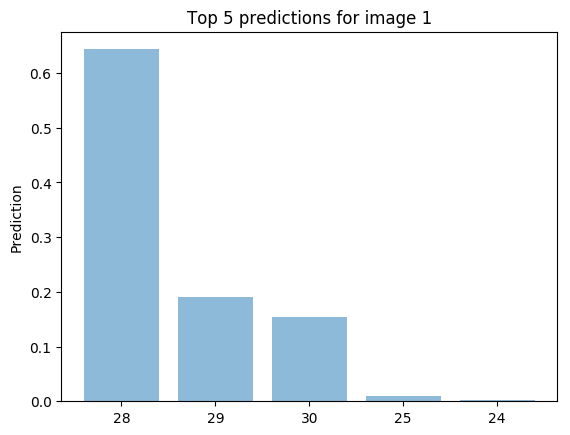

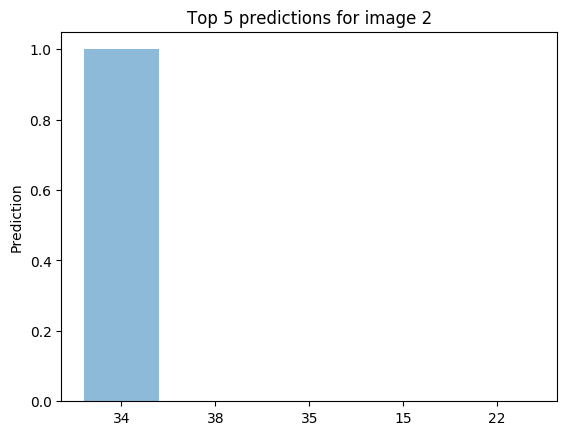

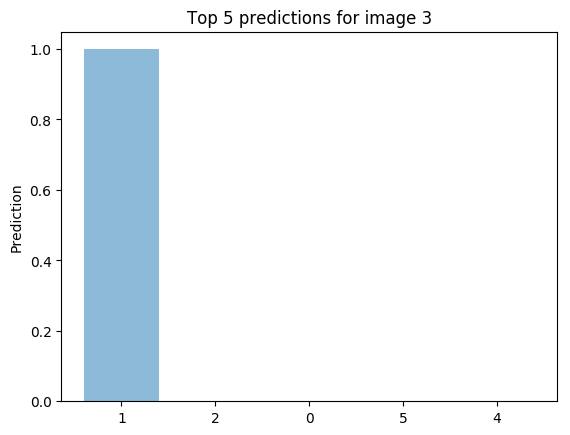

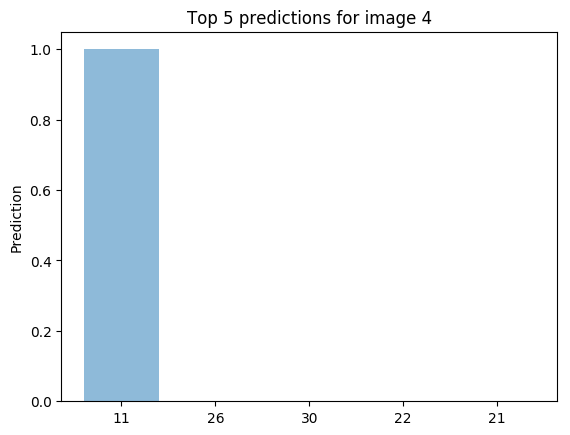

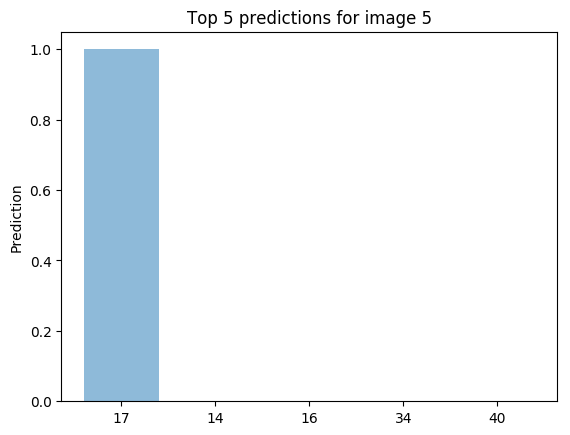

In [28]:
### Visualize the softmax probabilities as bar graph

import matplotlib.pyplot as plt; plt.rcdefaults()
import numpy as np
import matplotlib.pyplot as plt

for i in range(5):
    objects = indices[i]
    performance = values[i]
    y_pos = np.arange(5)

    plt.bar(y_pos, performance, align='center', alpha=0.5)
    plt.xticks(y_pos, objects)
    plt.ylabel('Prediction')
    plt.title('Top 5 predictions for image ' + str(i+1))
    plt.show()

### Project Writeup

Once you have completed the code implementation, document your results in a project writeup using this [template](https://github.com/udacity/CarND-Traffic-Sign-Classifier-Project/blob/master/writeup_template.md) as a guide. The writeup can be in a markdown or pdf file. 

> **Note**: Once you have completed all of the code implementations and successfully answered each question above, you may finalize your work by exporting the iPython Notebook as an HTML document. You can do this by using the menu above and navigating to  \n",
    "**File -> Download as -> HTML (.html)**. Include the finished document along with this notebook as your submission.

---

## Step 4 (Optional): Visualize the Neural Network's State with Test Images

 This Section is not required to complete but acts as an additional excersise for understaning the output of a neural network's weights. While neural networks can be a great learning device they are often referred to as a black box. We can understand what the weights of a neural network look like better by plotting their feature maps. After successfully training your neural network you can see what it's feature maps look like by plotting the output of the network's weight layers in response to a test stimuli image. From these plotted feature maps, it's possible to see what characteristics of an image the network finds interesting. For a sign, maybe the inner network feature maps react with high activation to the sign's boundary outline or to the contrast in the sign's painted symbol.

 Provided for you below is the function code that allows you to get the visualization output of any tensorflow weight layer you want. The inputs to the function should be a stimuli image, one used during training or a new one you provided, and then the tensorflow variable name that represents the layer's state during the training process, for instance if you wanted to see what the [LeNet lab's](https://classroom.udacity.com/nanodegrees/nd013/parts/fbf77062-5703-404e-b60c-95b78b2f3f9e/modules/6df7ae49-c61c-4bb2-a23e-6527e69209ec/lessons/601ae704-1035-4287-8b11-e2c2716217ad/concepts/d4aca031-508f-4e0b-b493-e7b706120f81) feature maps looked like for it's second convolutional layer you could enter conv2 as the tf_activation variable.

For an example of what feature map outputs look like, check out NVIDIA's results in their paper [End-to-End Deep Learning for Self-Driving Cars](https://devblogs.nvidia.com/parallelforall/deep-learning-self-driving-cars/) in the section Visualization of internal CNN State. NVIDIA was able to show that their network's inner weights had high activations to road boundary lines by comparing feature maps from an image with a clear path to one without. Try experimenting with a similar test to show that your trained network's weights are looking for interesting features, whether it's looking at differences in feature maps from images with or without a sign, or even what feature maps look like in a trained network vs a completely untrained one on the same sign image.

<figure>
 <img src="visualize_cnn.png" width="380" alt="Combined Image" />
 <figcaption>
 <p></p> 
 <p style="text-align: center;"> Your output should look something like this (above)</p> 
 </figcaption>
</figure>
 <p></p> 


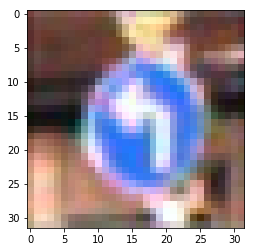

Layer 1 activations


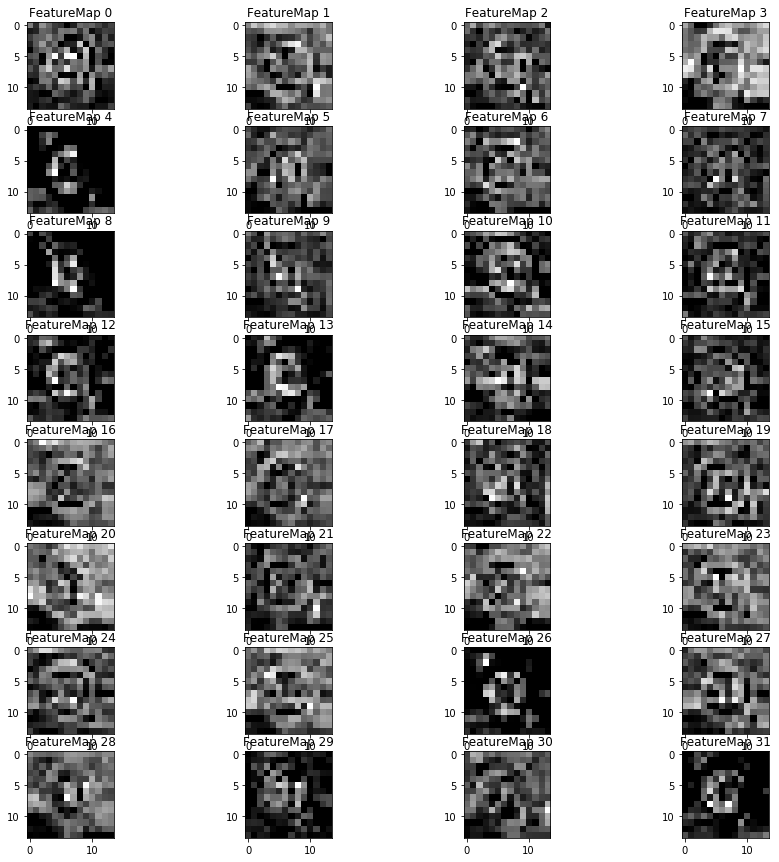

In [17]:
### Visualize your network's feature maps here.
### Feel free to use as many code cells as needed.

# image_input: the test image being fed into the network to produce the feature maps
# tf_activation: should be a tf variable name used during your training procedure that represents the calculated state of a specific weight layer
# activation_min/max: can be used to view the activation contrast in more detail, by default matplot sets min and max to the actual min and max values of the output
# plt_num: used to plot out multiple different weight feature map sets on the same block, just extend the plt number for each new feature map entry

def outputFeatureMap(activation, row, column, activation_min=-1, activation_max=-1 ,plt_num=1):

    featuremaps = activation.shape[3]
    plt.figure(plt_num, figsize=(15,15))
    for featuremap in range(featuremaps):
        plt.subplot(row,column, featuremap+1) # sets the number of feature maps to show on each row and column
        plt.title('FeatureMap ' + str(featuremap)) # displays the feature map number
        if activation_min != -1 & activation_max != -1:
            plt.imshow(activation[0,:,:, featuremap], interpolation="nearest", vmin =activation_min, vmax=activation_max, cmap="gray")
        elif activation_max != -1:
            plt.imshow(activation[0,:,:, featuremap], interpolation="nearest", vmax=activation_max, cmap="gray")
        elif activation_min !=-1:
            plt.imshow(activation[0,:,:, featuremap], interpolation="nearest", vmin=activation_min, cmap="gray")
        else:
            plt.imshow(activation[0,:,:, featuremap], interpolation="nearest", cmap="gray")

img = cv2.imread('testImgs//34LeftAhead.jpg')
img = cv2.cvtColor(img,cv2.COLOR_BGR2RGB)
plt.imshow(img)
plt.show()

with tf.Session() as sess:
    sess.run(tf.global_variables_initializer())
    saver.restore(sess, './lenet')
    img1 = np.zeros(shape=(1,32,32,1), dtype=np.float32)
    img1[0] = g_downloaded_images[2]
    c1, c2, c3, _ = LeNet(img1, 1.0)
    init = tf.global_variables_initializer()
    sess.run(init)

    print('Layer 1 activations')
    activation = c1.eval(session=sess)
    outputFeatureMap(activation, 8,4)
    plt.show()